In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [19]:
# We want to call the CSV data and get it's lendth. The file needed to be edited to read the first row.
data = pd.read_csv('https://raw.githubusercontent.com/DillonOuimet/ECGR_4105/main/Homework_0/D3.csv')
m=len(data)
m

100

In [20]:
#Store the values in each column as an array
x1 = data.values[:, 0] # get input values from first column
x2 = data.values[:, 1] # get output values from second column
x3 = data.values[:, 2] # get output values from third column
y = data.values[:, 3] # get output values from fourth column

print('x1 = ', x1[: 5]) # Show only first 5 records
print('x2 = ', x2[: 5])
print('x3 = ', x3[:5])
print('y = ', y[: 5])
print('m = ', m)


x1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
x2 =  [3.44       0.13494949 0.82989899 1.52484848 2.21979798]
x3 =  [0.44       0.88848485 1.3369697  1.78545455 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100


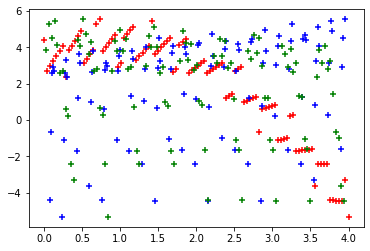

In [21]:
# I plotted all of the arrays to see what the explanatory variables looked like
plt.scatter(x1,y, color='red',marker= '+')
plt.scatter(x2,y, color='blue',marker= '+')
plt.scatter(x3,y, color='green',marker= '+')

In [22]:
#Lets create a matrix with single column of ones
##This will be the Xo values.
X_0 = np.ones((m, 1))
# Using reshape function convert x1, x2, and x3 1D array to 2D array of dimension 100x1
X_1 = x1.reshape(m, 1)
X_2 = x2.reshape(m, 1)
X_3 = x3.reshape(m, 1)



In [23]:
# Lets use hstack() function from numpy to stack X_0 and X_1-X_3 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X1 = np.hstack((X_0, X_1))
X2 = np.hstack((X_0, X_2))
X3 = np.hstack((X_0, X_3))

In [24]:
#Here, I set all of the theta values to zero
theta1 = np.zeros(2)
theta2 = np.zeros(2)
theta3 = np.zeros(2)


In [25]:
def loss(X, y, theta):
 """
 Compute loss for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(1 x m)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 Output Parameters
 -----------------
 J : Scalar value.
 """
##First multply the X values by theta
 predictions = X.dot(theta)
#Then subtract and s
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

In [26]:

## Write the function for gradient descent for multiple variables. 
def gd_Multi(X, y, theta, alpha, iterations,n):
# n is the number of columns in the theta (how many variables + 1) 
 """
 Compute cost for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(m x 1)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 alpha : Learning rate. Scalar value
 iterations: No of iterations. Scalar value.
 Output Parameters
 -----------------
 theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
 cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
 """
 cost_history = np.zeros(iterations)
 sum_delta = np.zeros(n)
 

 for i in range(iterations):
    h = X.dot(theta) ##gives a m x 1 array
    errors = np.subtract(h, y) ## also m x 1
    
    """ 
    Here is the main difference in my code vs what was provided.
    I run this for loop n times and multiple the thetas one at a time
    This should work for a data set of any amount of explanatory variables. 
    """
    for j in range(n):             
        sum_delta[j] = (alpha / m) * X[:,j].transpose().dot(errors); ##1 x 1 array
        theta[j] = theta[j] - sum_delta[j];     
        
    #call the loss function
    cost_history[i] = loss(X, y, theta)
 return theta, cost_history

In [27]:
iterations = 1500;
alpha = 0.01;
#now calculate the loss function for each explanatory variable.

theta1, cost_history1 = gd_Multi(X1, y, theta1, alpha, iterations, 2)
theta2, cost_history2 = gd_Multi(X2, y, theta2, alpha, iterations, 2)
theta3, cost_history3 = gd_Multi(X3, y, theta3, alpha, iterations, 2)

print('Final value of thetas for X1 =', theta1)
print('Final value of thetas for X2 =', theta2)
print('Final value of thetas for X3 =', theta3)

Final value of thetas for X1 = [ 5.71850653 -1.9568206 ]
Final value of thetas for X2 = [0.71988473 0.56390334]
Final value of thetas for X3 = [ 2.78048129 -0.48451631]


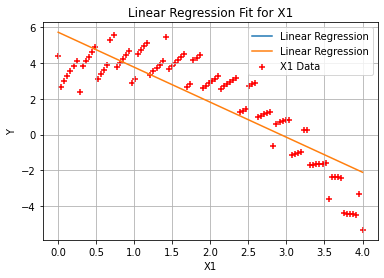

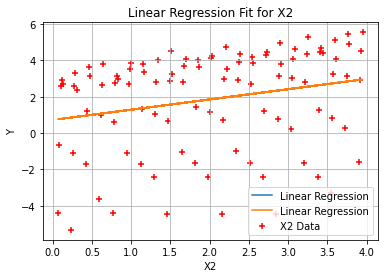

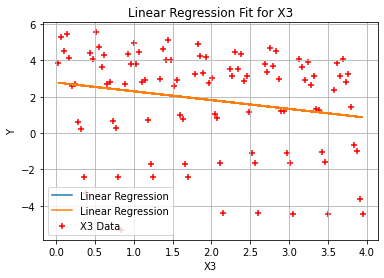

In [28]:
# Now plot the linear model for X1
plot1 = plt.figure(1)
plt.scatter(x1,y, color='red',marker= '+', label = 'X1 Data')
y1 = theta1[0] + X1.dot(theta1[1]);
plt.plot(X1,y1, label = 'Linear Regression')

plt.grid()
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression Fit for X1')
plt.legend()

#after plottingI want to save the plot for the report
plt.savefig('/Users/Dillon/Desktop/4105/Homework0/X1.png')

# Now plot the linear model for X2
plot2 = plt.figure(2)
plt.scatter(x2,y, color='red',marker= '+', label = 'X2 Data')
y2 = theta2[0] + X2.dot(theta2[1]);
plt.plot(X2,y2, label = 'Linear Regression')

plt.grid()
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Linear Regression Fit for X2')
plt.legend()

plt.savefig('/Users/Dillon/Desktop/4105/Homework0/X2.png')

# Now plot the linear model for X3
plot3 = plt.figure(3)
plt.scatter(x3,y, color='red',marker= '+', label = 'X3 Data')
y3 = theta3[0] + X3.dot(theta3[1]);
plt.plot(X3,y3, label = 'Linear Regression')

plt.grid()
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Linear Regression Fit for X3')
plt.legend()

plt.savefig('/Users/Dillon/Desktop/4105/Homework0/X3.png')

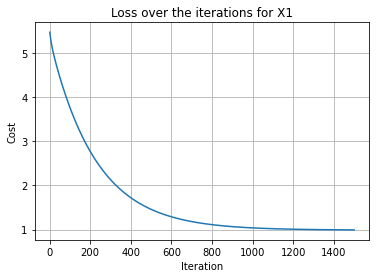

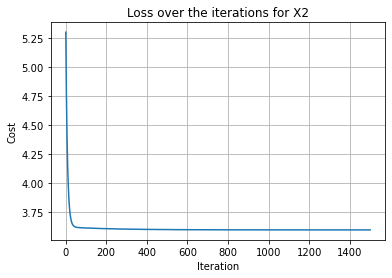

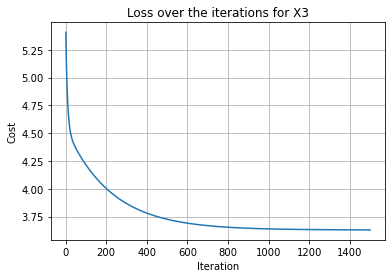

In [29]:
## Plotting the loss over the iteration for eah variable

## x1

plot1 = plt.figure(1)
plt.grid ()
plt.title('Loss over the iterations for X1')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.plot (range(1,iterations + 1), cost_history1)

plt.savefig('/Users/Dillon/Desktop/4105/Homework0/loss_x1.png')
## x2

plot2 = plt.figure(2)
plt.grid ()
plt.title('Loss over the iterations for X2')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.plot (range(1,iterations + 1), cost_history2)

## x3

plt.savefig('/Users/Dillon/Desktop/4105/Homework0/loss_x2.png')

plot3 = plt.figure(3)
plt.grid ()
plt.title('Loss over the iterations for X3')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.plot (range(1,iterations + 1), cost_history3)
plt.savefig('/Users/Dillon/Desktop/4105/Homework0/loss_x3.png')



In [30]:
##Start of Problem Two

In [31]:
## First store the variables as a m x 4 array.

#n is the number of variables (including X0)
n = 4
X0_3 = np.hstack((X_0, X_1, X_2, X_3))


In [32]:
#Run the gradient descent
theta0_3 = np.zeros(n)
iterations = 1500
#I want a slightly higher alpha and more iterations
theta0_3, cost_history0_3 = gd_Multi(X0_3, y, theta0_3, alpha+0.04, iterations, n)



In [33]:
print(theta0_3)

[ 5.31128136 -2.0033116   0.5330402  -0.26517886]


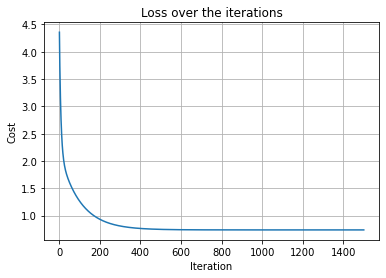

In [34]:
plt.plot (range(1,iterations +1), cost_history0_3)
plt.grid ()
plt.title('Loss over the iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.savefig('/Users/Dillon/Desktop/4105/Homework0/loss_final.png')